## 用Python算法预测客户行为案例

这是一份kaggle上的银行的数据集，研究该数据集可以预测客户是否认购定期存款y。这里包含20个特征。

In [6]:
# 导入相关包
import numpy as np
import pandas as pd 
# 读取数据
data = pd.read_csv(r'D:\soft_code\machine_learning\machinelearning\ML_example_cv_gridsearch\Bank-ADDITIONAL-master\bank-additional-full.csv',sep=';')
# 查看表的行列数
data.shape

(41188, 21)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

###  探索性数据分析

#### 年龄的分布

Text(0.5, 1.0, '各年龄段的人数')

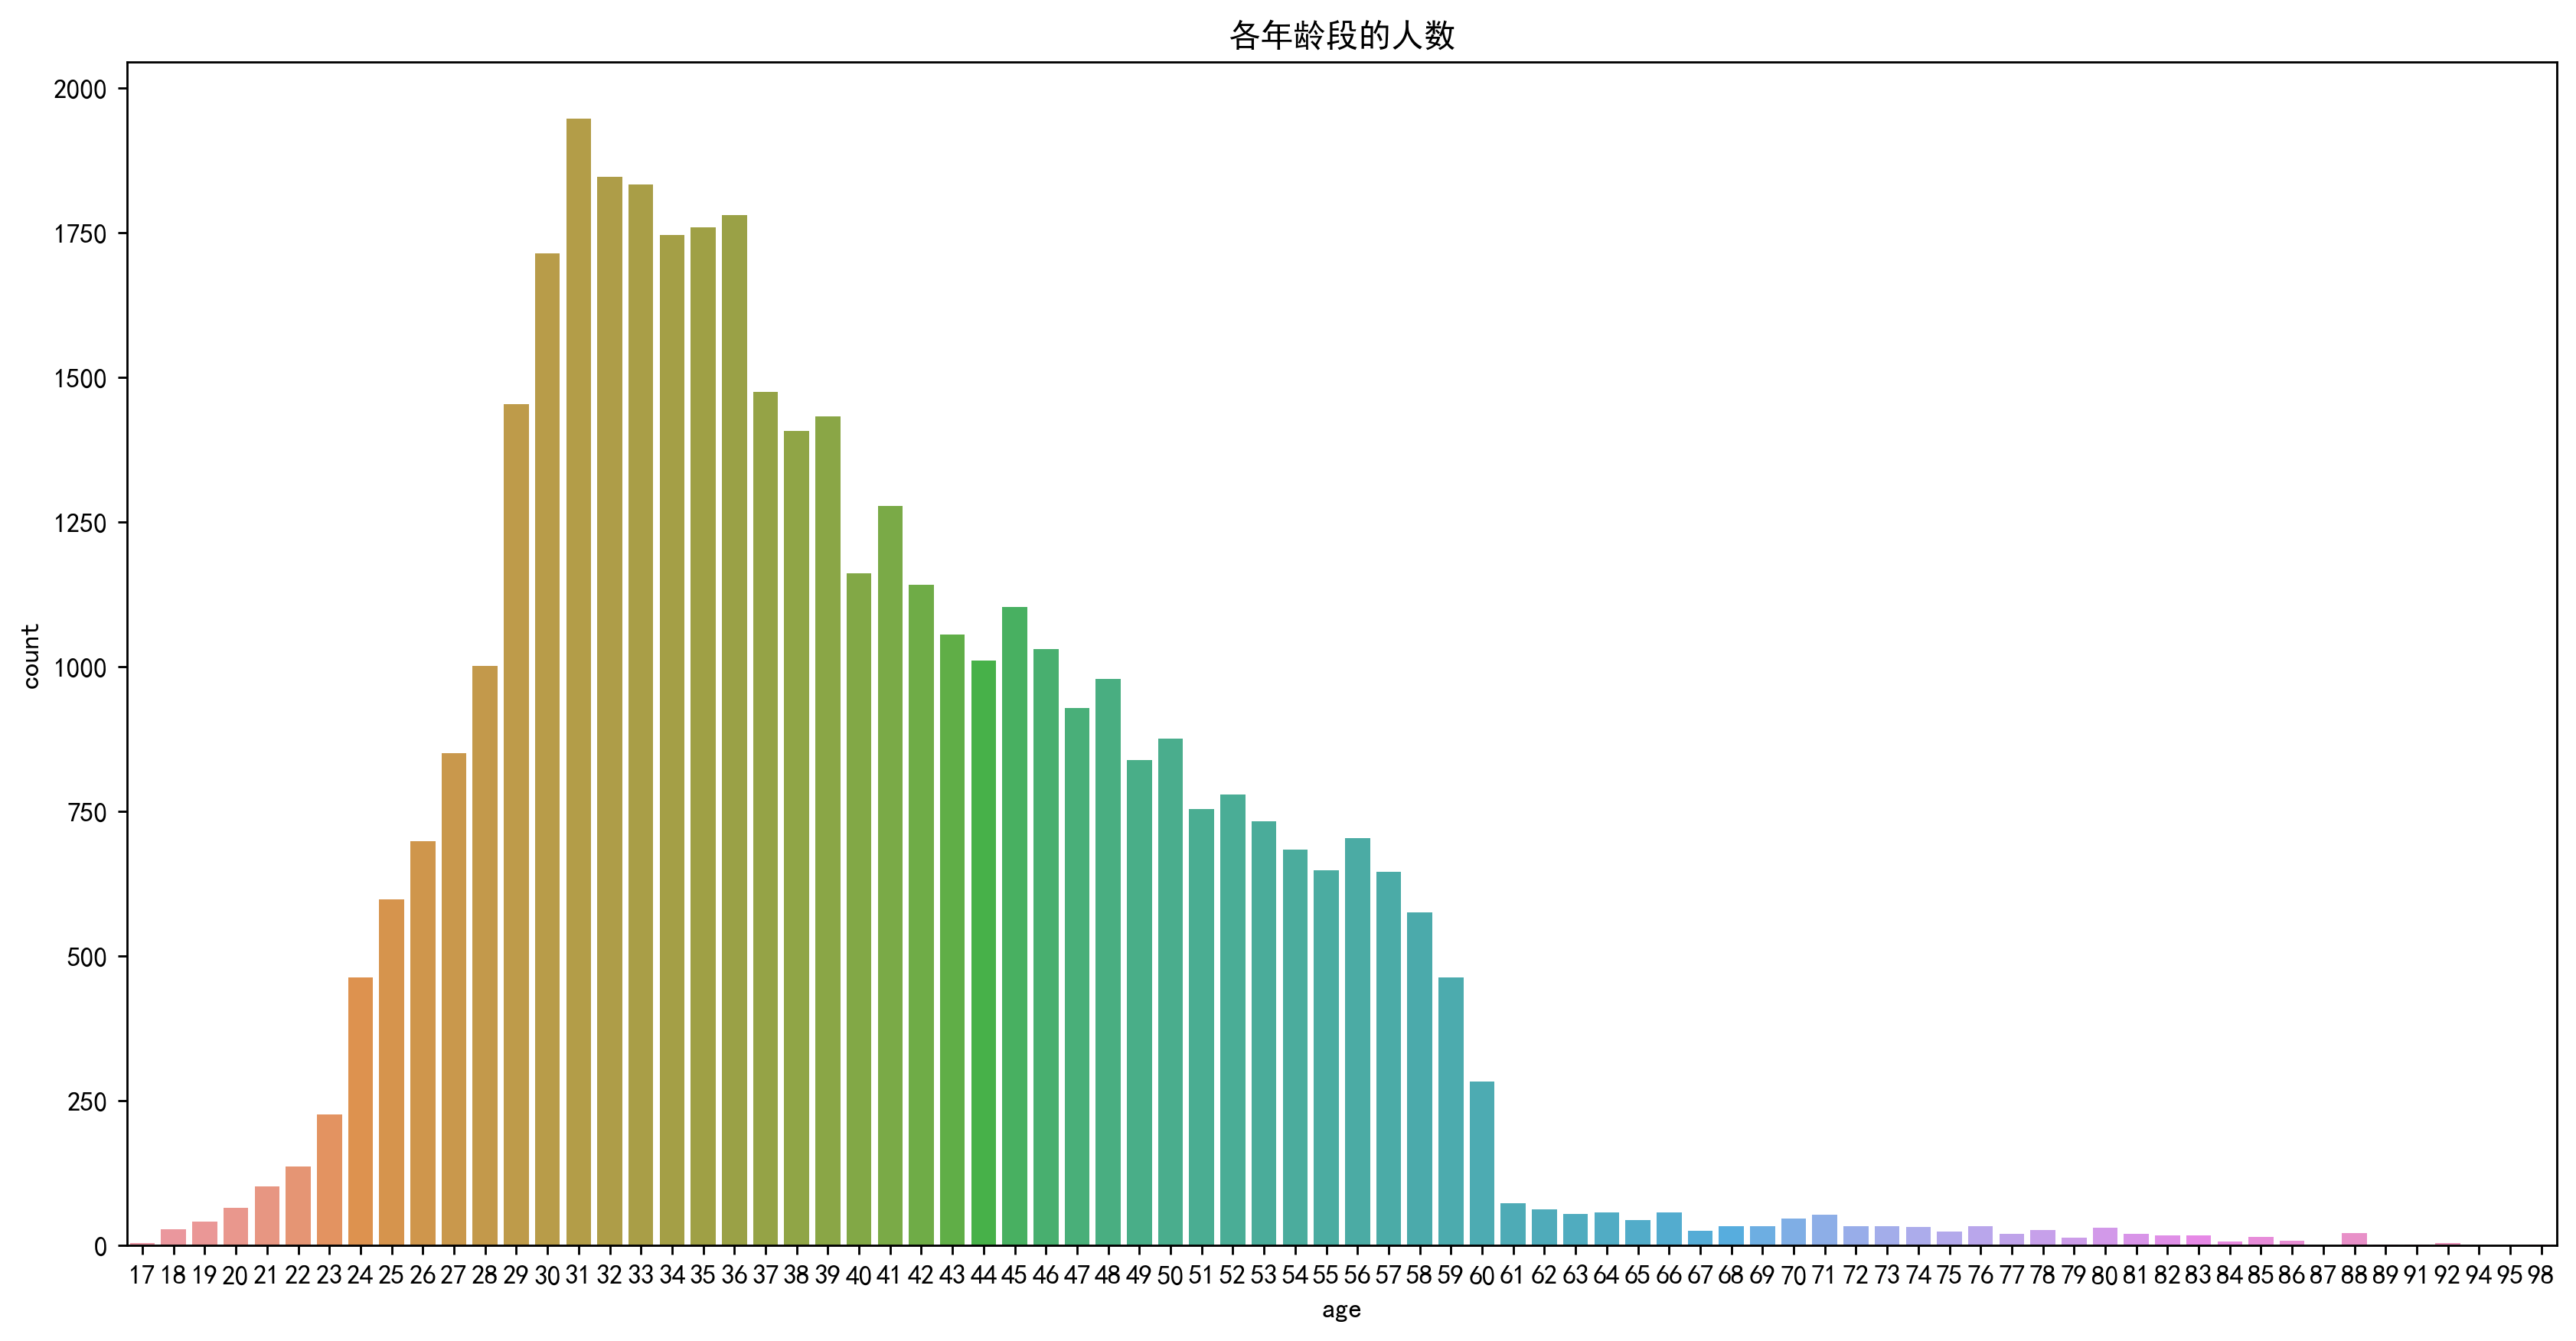

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif'] = 'SimHei'
plt.figure(figsize=(16, 8), dpi=256)
sns.countplot(x='age', data=data)
plt.title("各年龄段的人数")

#### 其他特征的一些分布

In [15]:
plt.figure(figsize=(18, 16), dpi=512)
plt.subplot(221)
sns.countplot(x='contact', data=data)
plt.title("contact分布情况")

plt.subplot(222)
sns.countplot(x='day_of_week', data=data)
plt.title("day_of_week分布情况")

plt.subplot(223)
sns.countplot(x='default', data=data)
plt.title("default分布情况")

plt.subplot(224)
sns.countplot(x='education', data=data)
plt.xticks(rotation=70)
plt.title("education分布情况")

Text(0.5, 1.0, 'education分布情况')

### 各特征的相关性

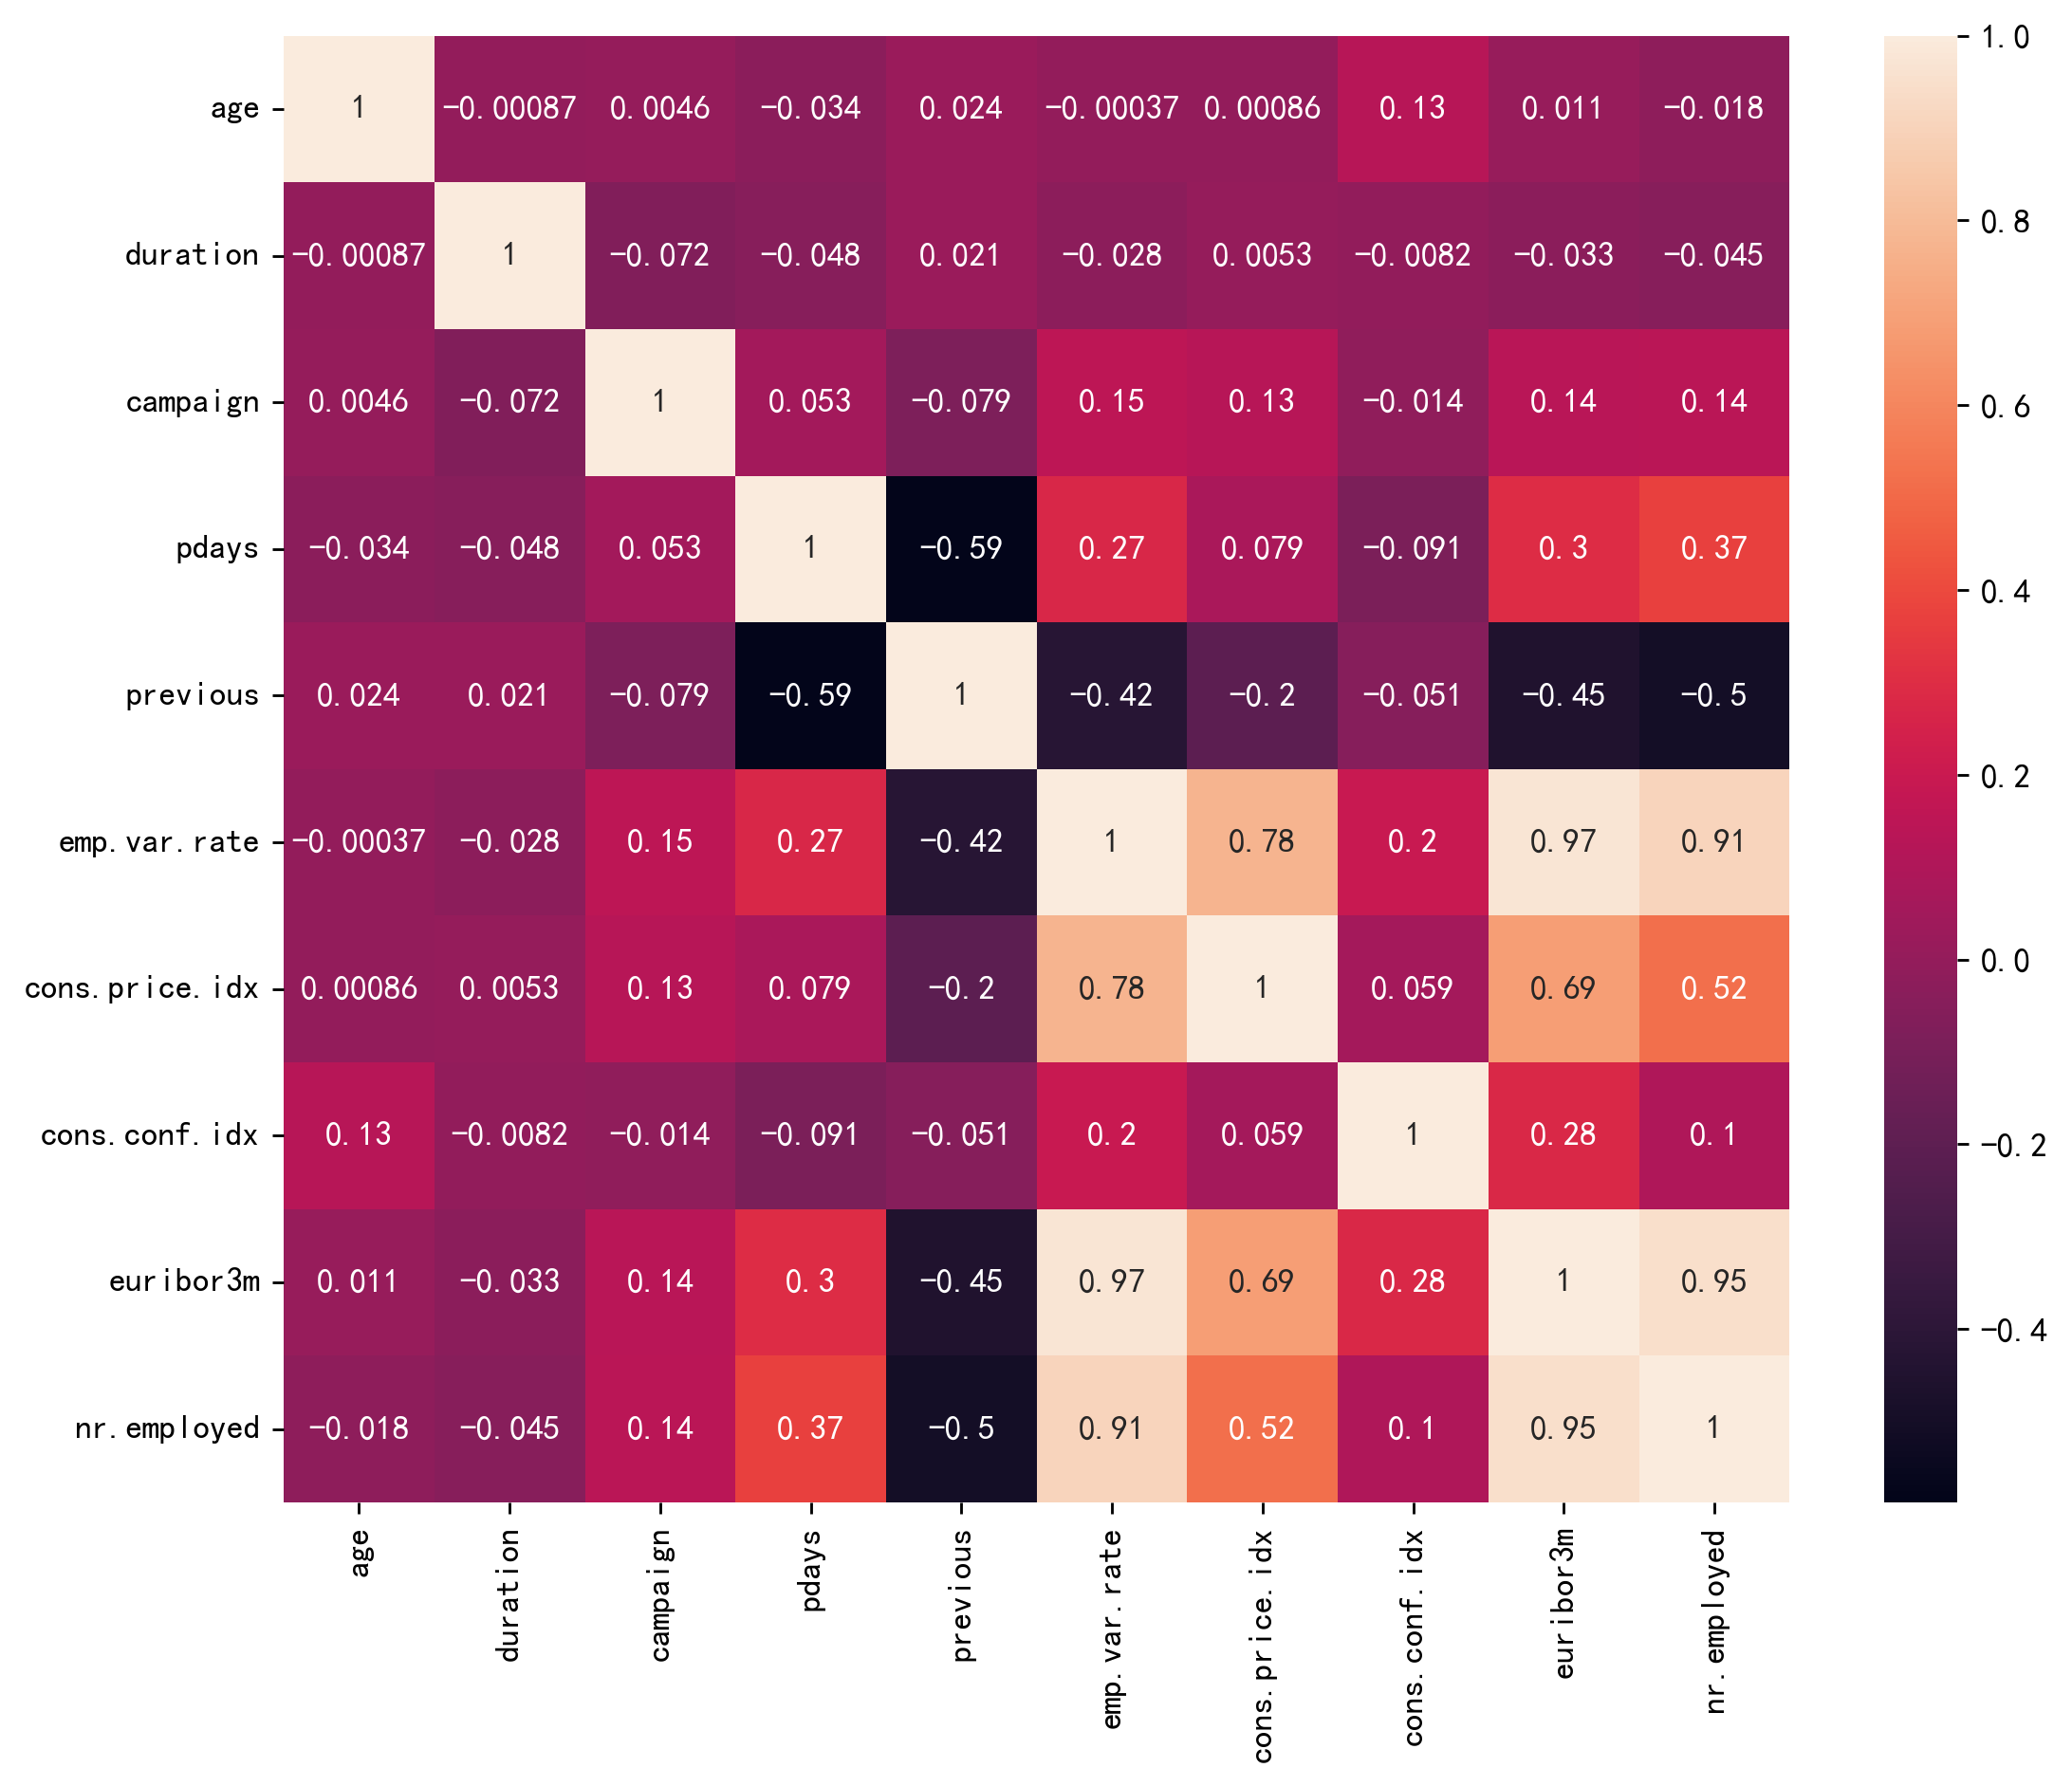

In [16]:
plt.figure(figsize=(10, 8), dpi=256)
plt.rcParams['axes.unicode_minus'] = False
sns.heatmap(data.corr(), annot=True)

### 特征规范化

#### 将自变量的特征值转换成标签类型

In [17]:
# 特征化数据
from sklearn.preprocessing import LabelEncoder
features = ['contact', 'day_of_week', 'default', 'education', 'housing',
           'job','loan', 'marital', 'month', 'poutcome']

le_x = LabelEncoder()
for feature in features:
    data[feature] = le_x.fit_transform(data[feature]) 

####  将结果y值转换成0、1

In [18]:
def parse_y(x):
    if (x == 'no'):
        return 0
    else:
        return 1
data['y'] = data['y'].apply(parse_y)
data['y'] = data['y'].astype(int)

#### 数据规范化

In [19]:
# 数据规范化到正态分布的数据
# 测试数据和训练数据的分割
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
ss = StandardScaler()
train_x, test_x, train_y, test_y = train_test_split(data.iloc[:,:-1], 
                                                   data['y'], 
                                                   test_size=0.3)
train_x = ss.fit_transform(train_x)
test_x = ss.transform(test_x)

### 模型训练

#### AdaBoost分类器

In [20]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
ada = AdaBoostClassifier()
ada.fit(train_x, train_y)
predict_y = ada.predict(test_x)
print("准确率：", accuracy_score(test_y, predict_y))

准确率： 0.907825523994497


#### SVC分类器

In [21]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(train_x, train_y)
predict_y = svc.predict(test_x)
print("准确率：", accuracy_score(test_y, predict_y))

准确率： 0.9069353402929513


#### K邻近值分类器

In [22]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(train_x, train_y)
predict_y = knn.predict(test_x)
print("准确率：", accuracy_score(test_y, predict_y))

准确率： 0.896091284292304


#### 决策树分类器

In [23]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(train_x, train_y)
predict_y = dtc.predict(test_x)
print("准确率：", accuracy_score(test_y, predict_y))

准确率： 0.8873512988589464


### 模型评价

#### AdaBoost分类器

Text(0.5, 1.0, 'AdaBoost分类器的ROC曲线')

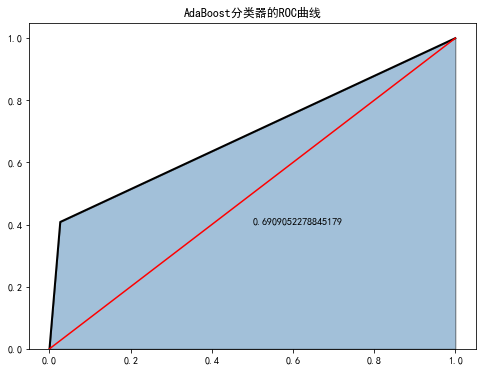

In [24]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
plt.figure(figsize=(8,6))
fpr1, tpr1, threshoulds1 = roc_curve(test_y, ada.predict(test_x))
plt.stackplot(fpr1, tpr1,color='steelblue', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr1, tpr1, linewidth=2, color='black')
plt.plot([0,1], [0,1], ls='-', color='red')
plt.text(0.5, 0.4, auc(fpr1, tpr1))
plt.title('AdaBoost分类器的ROC曲线')

#### SVC分类器

Text(0.5, 1.0, 'SVD的ROC曲线')

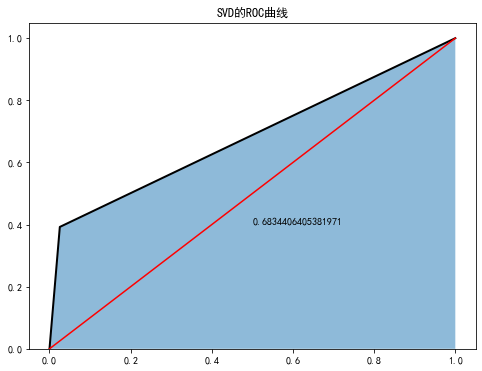

In [25]:
plt.figure(figsize=(8,6))
fpr2, tpr2, threshoulds2 = roc_curve(test_y, svc.predict(test_x))
plt.stackplot(fpr2, tpr2, alpha = 0.5)
plt.plot(fpr2, tpr2, linewidth=2, color='black')
plt.plot([0,1], [0,1],ls='-', color='red')
plt.text(0.5, 0.4, auc(fpr2, tpr2))
plt.title('SVD的ROC曲线')

#### 决策树分类器

Text(0.5, 1.0, '决策树的ROC曲线')

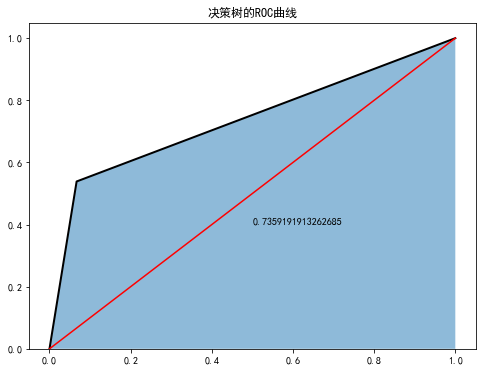

In [26]:
plt.figure(figsize=(8,6))
fpr4, tpr4, threshoulds4 = roc_curve(test_y, dtc.predict(test_x))
plt.stackplot(fpr4, tpr4, alpha = 0.5)
plt.plot(fpr4, tpr4, linewidth=2, color='black')
plt.plot([0,1], [0,1],ls='-', color='red')
plt.text(0.5, 0.4, auc(fpr4, tpr4))
plt.title('决策树的ROC曲线')